In [1]:
# !pip install pyreadstat

In [8]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import geopandas as gpd
import pickle
from shapely.geometry import Point
import os
import re
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans
scaler = StandardScaler()

# Levanta dataframes

In [9]:
stu = pickle.load(open('stu_sample.p',"rb"))
stu.head()

,CNTRYID,CNT,CNTSCHID,CNTSTUID,CYC,NatCen,Region,STRATUM,SUBNATIO,OECD,...,PV3SSES,PV4SSES,PV5SSES,PV6SSES,PV7SSES,PV8SSES,PV9SSES,PV10SSES,SENWT,VER_DAT
41922,76.0,BRA,7600001.0,7628061.0,06MS,007600,7600.0,BRA2549,0760000,0.0,...,292.441,265.223,349.694,359.034,333.992,323.978,355.030,290.974,0.50861,14NOV16:20:25:00
41923,76.0,BRA,7600001.0,7611939.0,06MS,007600,7600.0,BRA2549,0760000,0.0,...,263.857,333.110,289.815,275.886,308.443,334.062,347.188,356.220,0.50861,14NOV16:20:25:00
41924,76.0,BRA,7600001.0,7600555.0,06MS,007600,7600.0,BRA2549,0760000,0.0,...,271.911,302.190,230.035,224.453,368.723,241.524,330.580,240.854,0.43085,14NOV16:20:25:00
41925,76.0,BRA,7600001.0,7629227.0,06MS,007600,7600.0,BRA2549,0760000,0.0,...,324.209,308.340,305.776,321.851,259.394,320.636,349.514,306.663,0.43085,14NOV16:20:25:00
41926,76.0,BRA,7600001.0,7621770.0,06MS,007600,7600.0,BRA2549,0760000,0.0,...,328.754,233.642,375.885,254.953,396.913,425.482,356.967,308.303,0.43085,14NOV16:20:25:00


In [10]:
stu2 = pickle.load(open('escuela_sample.p',"rb"))
stu2.head()

,CNTRYID,CNT,CNTSCHID,CYC,NatCen,Region,STRATUM,SUBNATIO,OECD,ADMINMODE,...,TOTST,CREACTIV,SCIERES,STUBEHA,TEACHBEHA,STRATIO,SCHLTYPE,W_SCHGRNRABWT,SENWT,VER_DAT
1706,76.0,BRA,7600001.0,06MS,007600,7600.0,BRA2549,0760000,0.0,2.0,...,4.0,1.0,1.0,1.3112,2.1294,19.0870,3.0,68.768676,7.02337,14NOV16:20:39:11
1707,76.0,BRA,7600002.0,06MS,007600,7600.0,BRA0611,0760000,0.0,2.0,...,4.0,1.0,3.0,-2.1504,-2.1182,11.6000,3.0,46.438988,4.74283,14NOV16:20:39:11
1708,76.0,BRA,7600003.0,06MS,007600,7600.0,BRA1529,0760000,0.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90.874457,9.28104,14NOV16:20:39:11
1709,76.0,BRA,7600004.0,06MS,007600,7600.0,BRA0815,0760000,0.0,2.0,...,1.0,2.0,1.0,2.1112,0.2229,33.0000,3.0,23.700054,2.42050,14NOV16:20:39:11
1710,76.0,BRA,7600005.0,06MS,007600,7600.0,BRA2243,0760000,0.0,2.0,...,7.0,1.0,6.0,0.9038,1.6471,23.7009,3.0,3.972919,0.40576,14NOV16:20:39:11


In [ ]:
spickle.dump(datos.sample(550),open(dir.files+'datos_resumen.p', "wb"))

In [11]:
escuela = pickle.load(open('escuela_sample.p',"rb"))
escuela.head()

,CNTRYID,CNT,CNTSCHID,CYC,NatCen,Region,STRATUM,SUBNATIO,OECD,ADMINMODE,...,TOTST,CREACTIV,SCIERES,STUBEHA,TEACHBEHA,STRATIO,SCHLTYPE,W_SCHGRNRABWT,SENWT,VER_DAT
1706,76.0,BRA,7600001.0,06MS,007600,7600.0,BRA2549,0760000,0.0,2.0,...,4.0,1.0,1.0,1.3112,2.1294,19.0870,3.0,68.768676,7.02337,14NOV16:20:39:11
1707,76.0,BRA,7600002.0,06MS,007600,7600.0,BRA0611,0760000,0.0,2.0,...,4.0,1.0,3.0,-2.1504,-2.1182,11.6000,3.0,46.438988,4.74283,14NOV16:20:39:11
1708,76.0,BRA,7600003.0,06MS,007600,7600.0,BRA1529,0760000,0.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90.874457,9.28104,14NOV16:20:39:11
1709,76.0,BRA,7600004.0,06MS,007600,7600.0,BRA0815,0760000,0.0,2.0,...,1.0,2.0,1.0,2.1112,0.2229,33.0000,3.0,23.700054,2.42050,14NOV16:20:39:11
1710,76.0,BRA,7600005.0,06MS,007600,7600.0,BRA2243,0760000,0.0,2.0,...,7.0,1.0,6.0,0.9038,1.6471,23.7009,3.0,3.972919,0.40576,14NOV16:20:39:11


In [12]:
prof = pickle.load(open('prof_sample.p',"rb"))
prof.head()

,CNTRYID,CNT,CNTSCHID,CNTTCHID,TEACHERID,CYC,NatCen,Region,STRATUM,SUBNATIO,...,TC045Q10,TC045Q11,TC045Q12,TC045Q13,TC045Q14,TC045Q15,EXCHT,TCLEAD,W_SCHGRNRABWT,VER_DAT
16234,76.0,BRA,7600001.0,7601620.0,5.0,06MS,007600,7600.0,BRA2549,0760000,...,0.0,3.0,0.0,3.0,3.0,0.0,0.9714,1.0750,68.768676,14NOV16:20:39:50
16235,76.0,BRA,7600001.0,7602785.0,5.0,06MS,007600,7600.0,BRA2549,0760000,...,3.0,3.0,0.0,3.0,3.0,3.0,-1.6402,-1.7936,68.768676,14NOV16:20:39:50
16236,76.0,BRA,7600001.0,7607864.0,NaN,06MS,007600,7600.0,BRA2549,0760000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68.768676,14NOV16:20:39:50
16237,76.0,BRA,7600001.0,7604173.0,NaN,06MS,007600,7600.0,BRA2549,0760000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68.768676,14NOV16:20:39:50
16238,76.0,BRA,7600001.0,7606527.0,4.0,06MS,007600,7600.0,BRA2549,0760000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68.768676,14NOV16:20:39:50


In [13]:
print("Escuelas", escuela.shape)
print("Profesores", prof.shape)
print("Estudiantes", stu.shape)
print("Estudiantes 2", stu2.shape)

Escuelas (2651, 273)
Profesores (24771, 257)
Estudiantes (75327, 921)
Estudiantes 2 (2651, 273)


In [14]:
stu.CNT.value_counts() #Paises en la tabla

BRA    23141
CAN    20058
COL    11795
MEX     7568
CHL     7053
USA     5712
Name: CNT, dtype: int64

In [15]:
# Creo el promedio para los valores posibles de notas en matemática, lectura y ciencia

In [16]:
stu["MATH"] = stu[["PV1MATH", "PV2MATH", "PV3MATH", "PV4MATH", "PV5MATH", "PV6MATH", "PV7MATH", "PV8MATH", "PV9MATH", "PV10MATH"]].mean(axis=1)

In [17]:
stu["READ"] = stu[["PV1READ", "PV2READ", "PV3READ", "PV4READ", "PV5READ", "PV6READ", "PV7READ", "PV8READ", "PV9READ", "PV10READ"]].mean(axis=1)

In [18]:
stu["SCI"] = stu[["PV1SCIE", "PV2SCIE", "PV3SCIE", "PV4SCIE", "PV5SCIE", "PV6SCIE", "PV7SCIE", "PV8SCIE", "PV9SCIE", "PV10SCIE"]].mean(axis=1)

In [19]:
# me quedo con los registros donde hay valores para las 3 asignaturas

In [20]:
stu = stu.loc[stu[["MATH", "READ", "SCI"]].isnull().sum(axis=1) != 3, :]

In [21]:
# Cálculo el promedio de las 3 notas
stu['AVG'] = stu.loc[:, ["MATH", "READ", "SCI"]].mean(axis=1)

In [22]:
# Busco la asignatura con máximo puntaje promedio

In [23]:
stu.loc[:, "Max_Score"] = stu.loc[:, ["MATH", "READ", "SCI"]].idxmax(axis=1) 

stu.loc[:, "Min_Score"] = stu.loc[:, ["MATH", "READ", "SCI"]].idxmin(axis=1) 

In [24]:
stu.loc[:,["MATH", "READ", "SCI", "Max_Score", "Min_Score", "AVG"]].sample(5)

,MATH,READ,SCI,Max_Score,Min_Score,AVG
284226,481.1174,411.9181,414.6266,MATH,READ,435.887367
78770,550.3579,590.0557,600.9917,SCI,MATH,580.468433
59252,278.8923,317.2251,279.4879,READ,MATH,291.868433
106438,366.4874,421.6606,399.3075,READ,MATH,395.818500
75002,573.8144,583.3416,613.3121,SCI,MATH,590.156033


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000283C5CD76A0>,
      dtype=object)

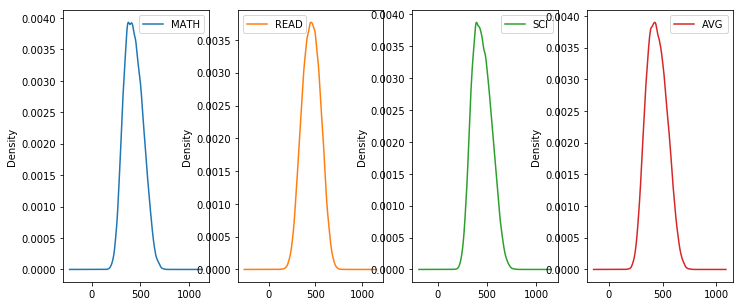

In [25]:
stu[["MATH", "READ", "SCI", "AVG"]].plot(kind='density', subplots=True, layout=(1,4), sharex=False, figsize=(12,5))

In [26]:
# Calculamos la variable a clasificar de los promedios de cada área, usando los criterios de PISA
stu["score_total"] = round(stu[["MATH", "READ", "SCI"]].mean(axis=1))
stu["score_range"] = 1
stu.loc[(stu.score_total >= 340)&(stu.score_total < 440), "score_range"]=1
stu.loc[(stu.score_total >= 440)&(stu.score_total < 540), "score_range"]=2
stu.loc[(stu.score_total >= 540)&(stu.score_total < 640), "score_range"]=3
stu.loc[stu.score_total >= 640, "score_range"]=4

stu["score_range2"] = 0
stu.loc[(stu.score_range == 1),"score_range2"] = 1
stu.loc[(stu.score_range == 2)|(stu.score_range == 3)|(stu.score_range == 4),"score_range2"] = 2

print(stu.score_range.value_counts())
print(stu.score_range2.value_counts()) #Observamos si nuestras clases están bien balanceadas

1    37444
2    25119
3    11421
4     1343
Name: score_range, dtype: int64
2    37883
1    37444
Name: score_range2, dtype: int64


In [27]:
stu.shape

(75327, 930)

In [28]:
stu.columns

Index(['CNTRYID', 'CNT', 'CNTSCHID', 'CNTSTUID', 'CYC', 'NatCen', 'Region',
       'STRATUM', 'SUBNATIO', 'OECD',
       ...
       'VER_DAT', 'MATH', 'READ', 'SCI', 'AVG', 'Max_Score', 'Min_Score',
       'score_total', 'score_range', 'score_range2'],
      dtype='object', length=930)

In [29]:
vars_X = ['DISCLISCI',
 'TEACHSUP',
 'IBTEACH',
 'TDTEACH',
 'ENVAWARE',
 'ENVOPT',
 'JOYSCIE',
 'INTBRSCI',
 'INSTSCIE',
 'SCIEEFF',
 'EPIST',
 'SCIEACT',
 'hisei',
 'OUTHOURS',
 'MMINS',
 'LMINS',
 'SMINS',
 'TMINS',
 'BELONG',
 'ANXTEST',
 'MOTIVAT',
 'COOPERATE',
 'CPSVALUE',
 'EMOSUPS',
 'PERFEED',
 'ADINST',
 'unfairteacher',
 'PARED',
 'CULTPOSS',
 'HEDRES',
 'HOMEPOS',
 'ICTRES',
 'WEALTH',
 'Region',
 'IMMIG',
 'MISCED',
 'FISCED',
 'HISCED',
 'REPEAT',
 'DURECEC',
  'COBN_F',
  'COBN_M',
  'COBN_S',
'ST022Q01TA',
          'CNT', 
 'ESCS','MATH', 'READ', 'SCI', 'AVG', 'Max_Score', 'Min_Score',
       'score_total', 'score_range', 'score_range2', 'SENWT']

In [30]:
stu = stu[vars_X].dropna(axis=0) #sacamos filas que tienen NaN
stu.shape

(12479, 56)

In [31]:
X_numericas = stu[['DISCLISCI',
                 'TEACHSUP',
                 'IBTEACH',
                 'TDTEACH',
                 'ENVAWARE',
                 'ENVOPT',
                 'JOYSCIE',
                 'INTBRSCI',
                 'INSTSCIE',
                 'SCIEEFF',
                 'EPIST',
                 'SCIEACT',
                 'hisei',
                 'OUTHOURS',
                 'MMINS',
                 'LMINS',
                 'SMINS',
                 'TMINS',
                 'BELONG',
                 'ANXTEST',
                 'MOTIVAT',
                 'COOPERATE',
                 'CPSVALUE',
                 'EMOSUPS',
                 'PERFEED',
                 'ADINST',
                 'unfairteacher',
                 'PARED',
                 'CULTPOSS',
                 'HEDRES',
                 'HOMEPOS',
                 'ICTRES',
                 'WEALTH',
                 'ESCS']]

X_numericas.sample(3)

,DISCLISCI,TEACHSUP,IBTEACH,TDTEACH,ENVAWARE,ENVOPT,JOYSCIE,INTBRSCI,INSTSCIE,SCIEEFF,...,PERFEED,ADINST,unfairteacher,PARED,CULTPOSS,HEDRES,HOMEPOS,ICTRES,WEALTH,ESCS
284236,-1.2894,-1.7888,1.3162,-0.1329,-0.3388,0.3281,-1.2636,-0.7446,1.7359,-3.7565,...,1.1758,-1.2740,9.0,6.0,-1.2278,-1.2004,-1.9412,-1.4034,-1.8082,-2.5895
289114,1.8837,0.5458,0.2317,0.2564,-1.1425,-1.0294,0.6412,0.6584,0.7648,-0.4032,...,0.7140,-0.3816,6.0,12.0,-1.6287,-1.4682,-1.9023,-1.3205,-1.5736,-1.5545
52618,0.0039,0.5503,0.9760,0.4505,0.1686,-1.7932,0.5301,-0.2052,0.3708,1.2229,...,0.3760,0.9784,12.0,17.0,0.0058,1.1563,-0.3944,-0.3461,-0.6171,0.7457


In [51]:
X_numericas.shape

(12479, 34)

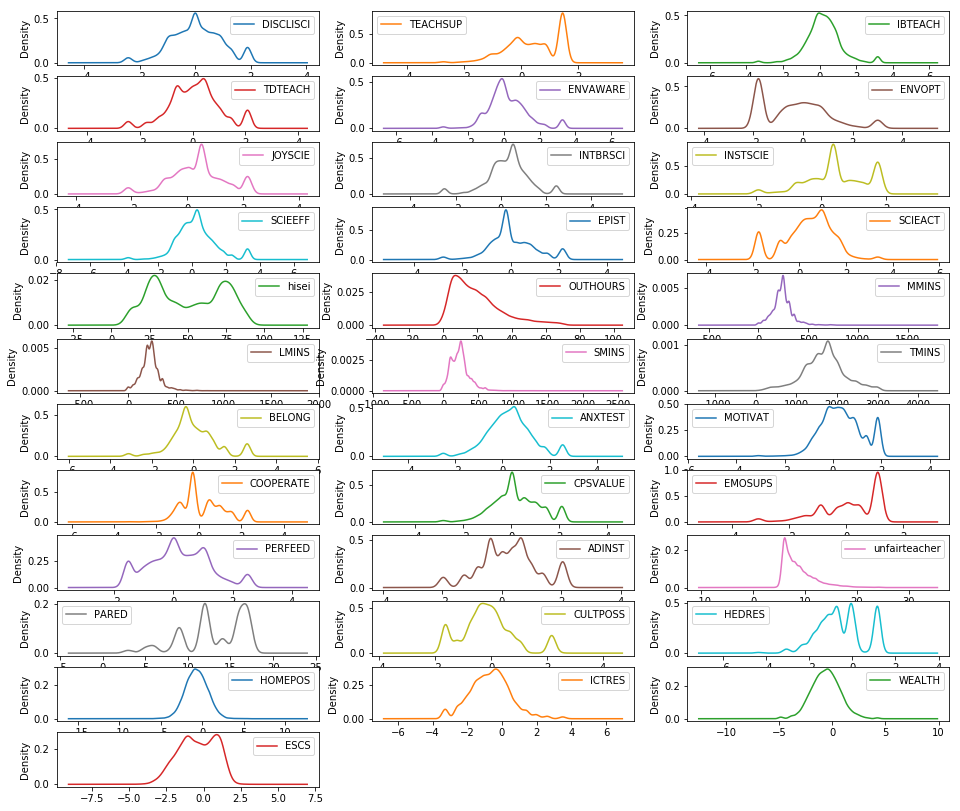

In [33]:
X_numericas.plot(kind='density', subplots=True, layout=(30,3), sharex=False, figsize=(16,36))
plt.show()

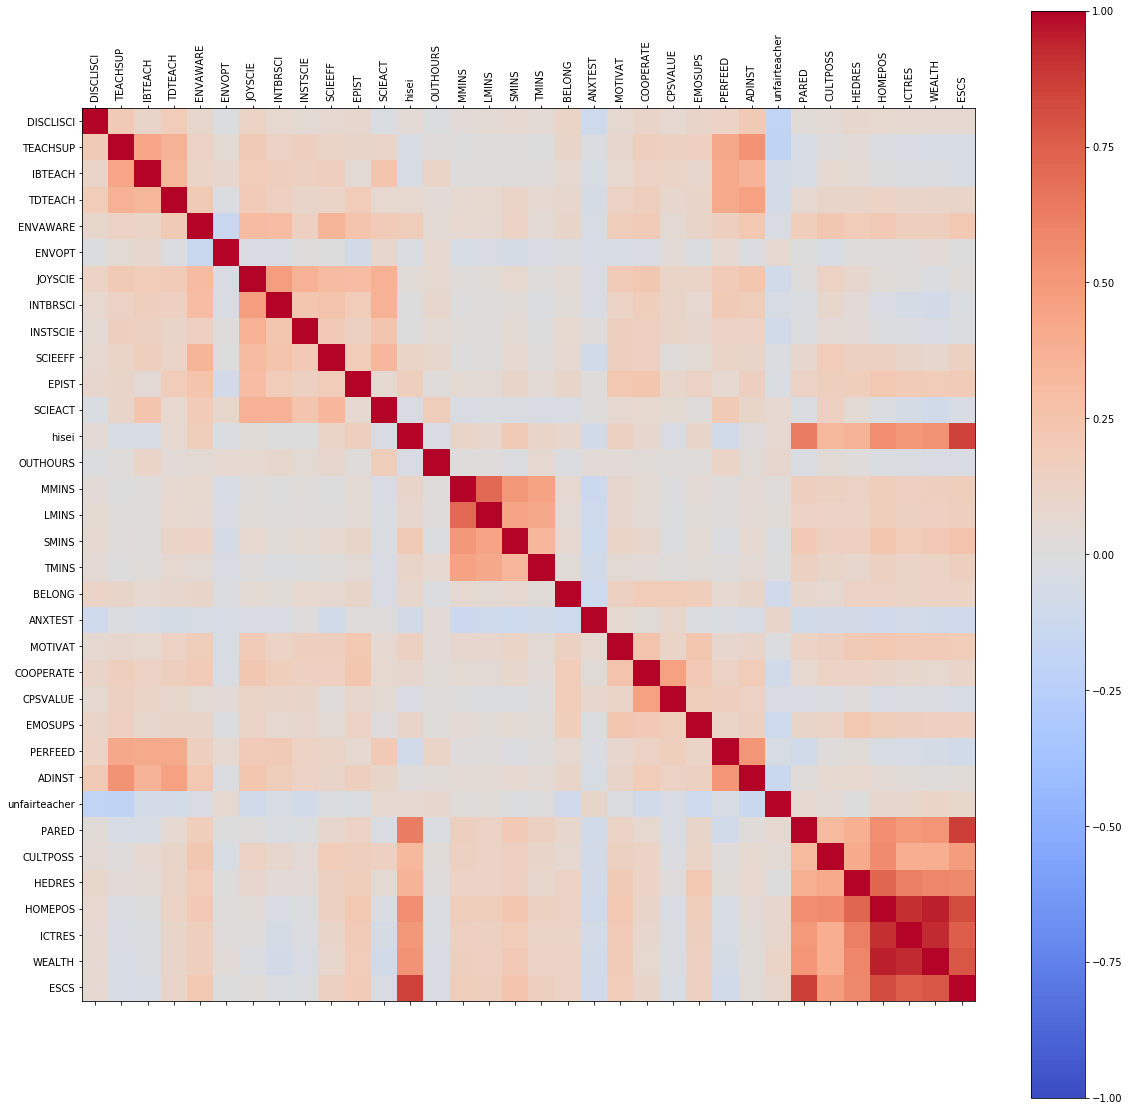

In [28]:
corr = X_numericas.corr()
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(X_numericas.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(X_numericas.columns)
ax.set_yticklabels(X_numericas.columns)
plt.show()

In [34]:
X = X_numericas

## Creación de Dummies para X

In [35]:
X_dummies = stu[[
  'Region',
 'IMMIG',
 'MISCED',
 'FISCED',
 'HISCED',
 'REPEAT',
 'DURECEC',
  'COBN_F',
  'COBN_M',
  'COBN_S',
'ST022Q01TA',
]]

X_dummies.sample(3)

,Region,IMMIG,MISCED,FISCED,HISCED,REPEAT,DURECEC,COBN_F,COBN_M,COBN_S,ST022Q01TA
92549,15200.0,1.0,6.0,6.0,6.0,0.0,2.0,015200,015200,015200,1.0
463732,84000.0,1.0,6.0,6.0,6.0,0.0,3.0,084000,084000,084000,1.0
283090,48400.0,1.0,2.0,1.0,2.0,0.0,2.0,048400,048400,048400,1.0


In [36]:
dummies_resul = []
for x in X_dummies.columns:
    
    dummies = pd.get_dummies(X_dummies[x], prefix=x+"_", drop_first=True)
    
    if len(dummies_resul)==0:
        dummies_resul = dummies.copy()
    else:
        dummies_resul = pd.concat([dummies_resul, dummies], axis=1)
    

In [37]:
X = pd.concat([X_numericas, dummies_resul], axis=1)

In [38]:
X.sample(3)

,DISCLISCI,TEACHSUP,IBTEACH,TDTEACH,ENVAWARE,ENVOPT,JOYSCIE,INTBRSCI,INSTSCIE,SCIEEFF,...,COBN_M__948400,COBN_M__984000,COBN_S__015200,COBN_S__048400,COBN_S__084000,COBN_S__907600,COBN_S__915200,COBN_S__948400,COBN_S__984000,ST022Q01TA__2.0
289605,-0.3506,0.2588,-0.7304,-0.8671,0.6771,-1.7932,0.5094,-0.4264,-0.4940,0.5037,...,0,0,0,1,0,0,0,0,0,0
47078,0.0039,0.0758,-0.1814,0.7888,0.2313,-1.7932,0.5094,0.5392,0.3708,0.5008,...,0,0,0,0,0,0,0,0,0,0
287749,0.0500,-1.2399,-0.6908,-0.8671,0.3108,0.2296,0.9054,0.3240,0.7648,-0.0477,...,0,0,0,1,0,0,0,0,0,0


## Standarización (opcionalmente usar _scaled o no)

In [39]:
# Utilizamos sklearn para estandarizar la matriz de features
scaler = StandardScaler()
X = scaler.fit_transform(X)

C:\Users\sanap\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\sanap\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [40]:
weight = stu.SENWT

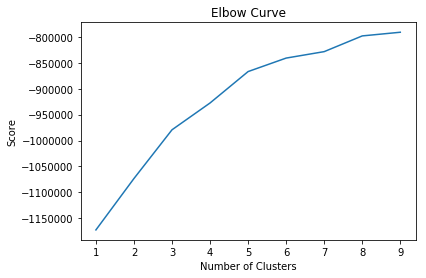

In [41]:
Nc = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X, sample_weight=weight) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [46]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(X, sample_weight=weight)

centroids = kmeans.cluster_centers_
# print(centroids)

In [47]:
# Predicting the clusters
stu['Cluster'] = kmeans.predict(X)

In [48]:
stu[["Cluster", "MATH", "READ", "SCI", "AVG"]].groupby('Cluster').mean().sort_values(by="AVG")

,MATH,READ,SCI,AVG
Cluster,,,,
1,431.022978,449.425575,436.893297,439.113950
3,427.460114,466.031924,453.495196,448.995745
2,480.673098,515.550574,502.303984,499.509218
0,504.780404,532.722517,534.152145,523.885022


In [49]:
stu[['CNT', "Cluster", "MATH", "READ", "SCI", "AVG"]].groupby(['CNT', 'Cluster']).mean().sort_values(by=['CNT', "AVG"])

MATH        READ         SCI         AVG
CNT Cluster                                                
BRA 2        398.462300  388.524200  386.338200  391.108233
    1        383.435925  438.713450  430.121900  417.423758
    3        423.323932  462.804148  449.802424  445.310168
CHL 3        311.326550  360.510600  341.576850  337.804667
    2        480.707859  515.604285  502.353018  499.555054
MEX 3        355.183553  368.041903  362.852484  362.025980
    1        431.070506  449.436274  436.900060  439.135613
    0        480.587414  482.217571  481.919786  481.574924
USA 3        473.401359  505.099858  496.525909  491.675709
    0        504.889171  532.949579  534.386973  524.075241

In [ ]:
--> random forest

In [ ]:
xgbust --> ensamble de árboles y a cada árbol se le muestra un pedazo del dataset